In [59]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# read data
csvPath = 'BTCUSD_H4.csv'
df = pd.read_csv(csvPath)
df.columns.tolist()

# convert small list
# df = df.sample(frac=0.1, random_state=4)

['Unnamed: 0.2',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'Time',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume']

In [61]:
# to int
df['High'] = df['High'].astype(int)
df['Open'] = df['Open'].astype(int)
df['Low'] = df['Low'].astype(int)
df['Close'] = df['Close'].astype(int)
df['Volume'] = df['Volume'].astype(int)
df['Time'] = pd.to_datetime(df['Time'])
df.to_csv(csvPath)

In [62]:
# calcute pivots
pivots = []
dates = []
counter = 0
lastPivot = 0
Range = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
dateRange = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in df.index:
    currentMax = max(Range, default=0) 
    value = round(df['High'][i], 2)

    Range = Range[1:9]
    Range.append(value)
    dateRange = dateRange[1:9]
    dateRange.append(i)

    if currentMax == max(Range, default=0):
        counter += 1
    else:
        counter = 0
    if counter == 8:
        lastPivot = currentMax
        dateloc = Range.index(lastPivot)
        lastDate = dateRange[dateloc]
        pivots.append(currentMax)
        dates.append(lastDate)

for i in range(len(pivots)):
    print(dates[i], pivots[i])

7 62499
45 57447
59 57448
68 59603
80 58590
90 61012
113 58060
131 43654
141 55439
154 59381
165 57357
186 47420
200 62030
217 63728
228 48177
238 59082
262 61212
293 64308
324 59246
343 57059
366 41958
377 57361
386 31788
395 64490
413 56902
423 48037
443 58363
457 65281
467 42089
488 48584
499 46921
515 62484
527 59211
544 62165
563 57699
585 67308
605 57755
615 59666
631 47833
640 47390
650 67242
662 54371
675 49377
695 68932
714 50426
730 63810
739 54633
749 67036
767 51586
788 55022
805 62509
818 57597
840 65216
875 43857
888 58866
913 46860
923 63970
941 68480
966 63485
986 56788
995 50839
1011 62697
1024 59192
1049 60524
1071 51922
1084 63223
1107 52782
1122 61430
1131 59022
1142 59125
1157 57763
1173 62640
1182 56284
1197 66078
1225 59394
1236 59935
1250 54000
1264 56416
1278 52735
1290 58016
1309 51798
1318 24131
1330 42549
1341 58962
1367 64395
1388 57095
1404 59657
1421 61657
1434 57922
1443 61208
1463 61470
1472 65584
1483 66642
1495 63050
1521 46996
1531 44073
1540 51648
1

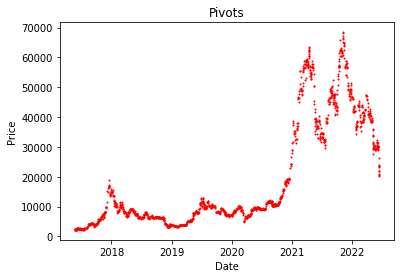

In [77]:
# show pivots
plt.scatter(df['Time'], df['Close'], color='red', s=1)
# plt.plot(dates, pivots, linewidth=2, marker='.', color='red')
# for i in range(len(pivots)):
#     plt.plot_date(dates[i], pivots[i], linestyle='-', marker=',', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Pivots')
plt.show()